# Algunas Visus del TP1
### pasando en limpio

In [1]:
!pip install pandas_profiling

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:20,.2f}'.format # sin notación científica

In [3]:
df = pd.read_csv('Entrenamieto_ECI_2020.csv')

# Procesamiento para visus

## Cantidad de Productos por Stage won/lost, y por Region

In [267]:
df_wonLostCompleto=df[(df['Stage']=='Closed Won')|(df['Stage']=='Closed Lost')]
df_wonLostCompleto

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,ASP_mean_por_date-y-moneda,ASP_(converted)_mean_por_date-y-moneda,Value_ASP_converted_to_ASP,Total_Amount_in_USD,Total_Taxable_Amount_in_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None,0.53,0.59,1.13,"5,964,043.80","5,964,043.80"
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"54,552.68","54,552.68"
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None,0.49,0.49,1.00,"83,865.60","83,865.60"
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None,0.49,0.49,1.00,"7,421,881.50","7,421,881.50"
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None,0.49,0.49,1.00,"13,357,192.50","13,357,192.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,"103,350.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"116,898.79","339,006.48"
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,"93,015.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"105,208.91","339,006.48"
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,"103,350.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"116,898.79","339,006.48"
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,"2,346,796.88",USD,0.00,Closed Lost,Prod_Category_A_None,0.64,0.64,1.00,"2,346,796.88",0.00


In [268]:
g_oppt2=df_wonLostCompleto[['Stage','Region','ID']].groupby(['Stage','Region']).agg('count')
g_oppt2

ID
Stage       Region           
Closed Lost APAC         1354
            Americas     2139
            EMEA         2189
            Japan        1546
            Middle East   120
Closed Won  APAC         1896
            Americas     1793
            EMEA         2471
            Japan        3323
            Middle East    50

In [269]:
g_oppt2.reset_index(inplace=True)
g_oppt2.columns=['Stage','Region','Cantidad de Productos']
g_oppt2

,Stage,Region,Cantidad de Productos
0,Closed Lost,APAC,1354
1,Closed Lost,Americas,2139
2,Closed Lost,EMEA,2189
3,Closed Lost,Japan,1546
4,Closed Lost,Middle East,120
5,Closed Won,APAC,1896
6,Closed Won,Americas,1793
7,Closed Won,EMEA,2471
8,Closed Won,Japan,3323
9,Closed Won,Middle East,50


In [270]:
# Graficando desde acá me queda Won en rojo, no me funcionaron las opciones de
# seaborn que creí que servían para cambiar el orden de colores.
# Df es pequeño, reordeno.
g_oppt2_ordenadoPGraf=g_oppt2.sort_values('Stage',ascending=False)
g_oppt2_ordenadoPGraf

,Stage,Region,Cantidad de Productos
5,Closed Won,APAC,1896
6,Closed Won,Americas,1793
7,Closed Won,EMEA,2471
8,Closed Won,Japan,3323
9,Closed Won,Middle East,50
0,Closed Lost,APAC,1354
1,Closed Lost,Americas,2139
2,Closed Lost,EMEA,2189
3,Closed Lost,Japan,1546
4,Closed Lost,Middle East,120


Text(0.5, 1.0, 'Cantidad de Productos Closed Won y Closed Lost según Región')

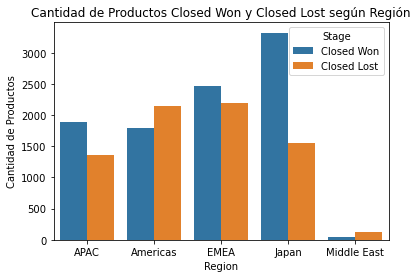

In [271]:
ax = sns.barplot(x="Region", y="Cantidad de Productos", hue="Stage", data=g_oppt2_ordenadoPGraf)
ax.set_title('Cantidad de Productos Closed Won y Closed Lost según Región')

## Diferencia de tiempo entre Last_Modified_Date y Opportunuty_Created_Date
Asumiendo, la hipótesis es que, last modified es la fecha de won o de lost.

In [294]:
# Primero obtengo un df con solo un registro por oportunidad, conservo las columnas que me interesan.
df_WL_opp=df_wonLostCompleto.groupby(['Opportunity_ID']).agg({'Stage':'min','Last_Modified_Date':'min','Opportunity_Created_Date':'min'})
df_WL_opp

,Stage,Last_Modified_Date,Opportunity_Created_Date
Opportunity_ID,,,
0,Closed Lost,6/13/2016,12/7/2015
1,Closed Won,1/15/2016,12/7/2015
2,Closed Won,9/29/2016,12/8/2015
3,Closed Lost,3/27/2018,12/8/2015
4,Closed Lost,3/27/2018,12/8/2015
...,...,...,...
12799,Closed Won,4/1/2016,12/4/2015
12800,Closed Lost,10/10/2016,12/4/2015
12801,Closed Won,1/19/2016,12/4/2015


In [295]:
df_deltaFechasDias=df_WL_opp[['Stage','Last_Modified_Date','Opportunity_Created_Date']]

In [296]:
df_deltaFechasDias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 12803
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Stage                     9789 non-null   object
 1   Last_Modified_Date        9789 non-null   object
 2   Opportunity_Created_Date  9789 non-null   object
dtypes: object(3)
memory usage: 305.9+ KB


In [297]:
df_deltaFechasDias['delta']=(pd.to_datetime(df_deltaFechasDias['Last_Modified_Date'],errors='coerce')\
                             -pd.to_datetime(df_deltaFechasDias['Opportunity_Created_Date'],errors='coerce'))
df_deltaFechasDias['dias activa']=df_deltaFechasDias['delta'].dt.days
df_deltaFechasDias

,Stage,Last_Modified_Date,Opportunity_Created_Date,delta,dias activa
Opportunity_ID,,,,,
0,Closed Lost,6/13/2016,12/7/2015,189 days,189
1,Closed Won,1/15/2016,12/7/2015,39 days,39
2,Closed Won,9/29/2016,12/8/2015,296 days,296
3,Closed Lost,3/27/2018,12/8/2015,840 days,840
4,Closed Lost,3/27/2018,12/8/2015,840 days,840
...,...,...,...,...,...
12799,Closed Won,4/1/2016,12/4/2015,119 days,119
12800,Closed Lost,10/10/2016,12/4/2015,311 days,311
12801,Closed Won,1/19/2016,12/4/2015,46 days,46


Separo y grafico por separado las lost y las won

In [298]:
df_deltaFechasDias_won=df_deltaFechasDias[df_deltaFechasDias['Stage']=='Closed Won']
df_deltaFechasDias_won.head(4)

,Stage,Last_Modified_Date,Opportunity_Created_Date,delta,dias activa
Opportunity_ID,,,,,
1,Closed Won,1/15/2016,12/7/2015,39 days,39
2,Closed Won,9/29/2016,12/8/2015,296 days,296
7,Closed Won,12/9/2015,12/9/2015,0 days,0
11,Closed Won,1/7/2016,12/9/2015,29 days,29


In [299]:
df_deltaFechasDias_lost=df_deltaFechasDias[df_deltaFechasDias['Stage']=='Closed Lost']
df_deltaFechasDias_lost.head(4)

,Stage,Last_Modified_Date,Opportunity_Created_Date,delta,dias activa
Opportunity_ID,,,,,
0,Closed Lost,6/13/2016,12/7/2015,189 days,189
3,Closed Lost,3/27/2018,12/8/2015,840 days,840
4,Closed Lost,3/27/2018,12/8/2015,840 days,840
5,Closed Lost,3/27/2018,12/8/2015,840 days,840


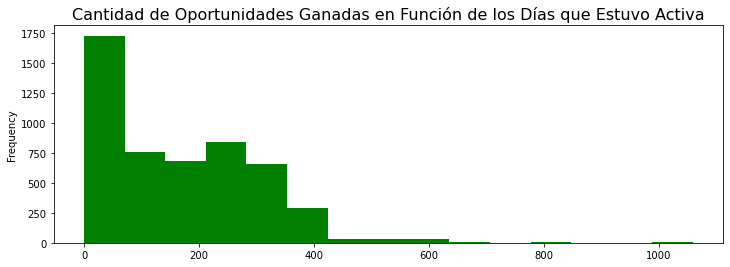

In [300]:
fig=plt.figure()
#ax=fig.add.subplot(111)
plt.title('Cantidad de Oportunidades Ganadas en Función de los Días que Estuvo Activa',fontsize=16)
ax.set_xlabel('Días Activos de Oportunidades Closed Won')
df_deltaFechasDias_won['dias activa'].plot.hist(color='green',figsize=(12,4),bins=15)
plt.show()

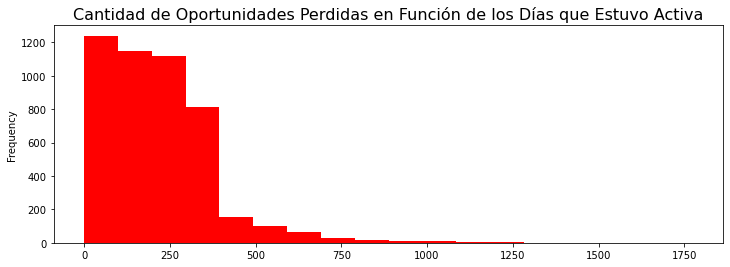

In [301]:
fig=plt.figure()
#ax=fig.add.subplot(111)
plt.title('Cantidad de Oportunidades Perdidas en Función de los Días que Estuvo Activa',fontsize=16)
ax.set_xlabel('Días Activos de Oportunidades Closed Lost')
df_deltaFechasDias_lost['dias activa'].plot.hist(color='red',figsize=(12,4),bins=18)
plt.show()

### Cantidad de clientes que vuelve a comprar

In [245]:
# Un registro por oportunidad
clientes=df.groupby(['Opportunity_ID']).agg({'Account_Name':'min','Stage':'min'})
clientes

,Account_Name,Stage
Opportunity_ID,,
0,Account_Name_619,Closed Lost
1,Account_Name_619,Closed Won
2,Account_Name_1794,Closed Won
3,Account_Name_1201,Closed Lost
4,Account_Name_1201,Closed Lost
...,...,...
12799,Account_Name_533,Closed Won
12800,Account_Name_404,Closed Lost
12801,Account_Name_726,Closed Won


In [247]:
clientes=clientes.reset_index()
clientes.head(3)

,index,Opportunity_ID,Account_Name,Stage
0,0,0,Account_Name_619,Closed Lost
1,1,1,Account_Name_619,Closed Won
2,2,2,Account_Name_1794,Closed Won


In [249]:
# continúo el filtrado. # Ahora sí son efectivamente clientes
clientes_won=clientes.loc[clientes['Stage']=='Closed Won',['Account_Name','Opportunity_ID']]
clientes_won.head(14)

,Account_Name,Opportunity_ID
1,Account_Name_619,1
2,Account_Name_1794,2
7,Account_Name_1794,7
11,Account_Name_1147,11
20,Account_Name_263,20
21,Account_Name_1662,21
22,Account_Name_1888,22
23,Account_Name_270,23
24,Account_Name_270,24
27,Account_Name_1988,27


In [250]:
# Cuántas oportunidades concretó cada cliente
clientes_won=clientes_won.groupby('Account_Name').agg(['count'])
clientes_won.head(9)

,Opportunity_ID
,count
Account_Name,
Account_Name_0,1
Account_Name_100,1
Account_Name_1001,1
Account_Name_1002,1
Account_Name_1006,1
Account_Name_1012,2
Account_Name_1017,4
Account_Name_1023,1


In [251]:
clientes_won=clientes_won.reset_index()
clientes_won.columns=['Account_Name','CantidadDeOpsConcretadas']
clientes_won.head(8)

,Account_Name,CantidadDeOpsConcretadas
0,Account_Name_0,1
1,Account_Name_100,1
2,Account_Name_1001,1
3,Account_Name_1002,1
4,Account_Name_1006,1
5,Account_Name_1012,2
6,Account_Name_1017,4
7,Account_Name_1023,1


In [252]:
# Cuántos clientes compraron más de una vez y cuántos una sola vez
clientes_compraron=clientes_won.groupby(['CantidadDeOpsConcretadas']).agg('count')
clientes_compraron.head(14)

,Account_Name
CantidadDeOpsConcretadas,
1,310
2,86
3,62
4,34
5,20
6,20
7,14
8,9
9,14


In [253]:
clientes_compraron=clientes_compraron.reset_index()
clientes_compraron.columns=['CantidadDeOpsConcretadas','CantidadDeClientesQueLasConcretaron']
# (es un nombre largo, sí)

In [254]:
clientes_compraron ##info

,CantidadDeOpsConcretadas,CantidadDeClientesQueLasConcretaron
0,1,310
1,2,86
2,3,62
3,4,34
4,5,20
5,6,20
6,7,14
7,8,9
8,9,14
9,10,7


In [255]:
###
# Breve cuenta
clientes_compraron[clientes_compraron['CantidadDeClientesQueLasConcretaron']==1]

,CantidadDeOpsConcretadas,CantidadDeClientesQueLasConcretaron
25,27,1
27,30,1
28,31,1
29,32,1
30,36,1
31,45,1
32,46,1
34,48,1
35,49,1
36,50,1


In [256]:
suma_clientes=clientes_compraron.loc[clientes_compraron['CantidadDeClientesQueLasConcretaron']==1,'CantidadDeClientesQueLasConcretaron'].sum()
suma_clientes

26

In [257]:
suma_cantidad=clientes_compraron.loc[clientes_compraron['CantidadDeClientesQueLasConcretaron']==1,'CantidadDeOpsConcretadas'].sum()
suma_cantidad

2401

In [260]:
# Este número debería ser 5072, que eran las oportunidades won 'únicas' (un registro x op), o sea la cantVentas
(clientes_compraron['CantidadDeOpsConcretadas']*clientes_compraron['CantidadDeClientesQueLasConcretaron']).sum()

5072

In [261]:
suma_cantidad/5072

0.4733832807570978

Estos 26 clientes acumulan 2401 compras a la empresa de refrigeración, es decir, 26 clientes realizaron el 47% de las compras registradas por la empresa.

In [262]:
# y es
clientes_compraron['CantidadDeClientesQueLasConcretaron'].sum()

667

In [263]:
26/667

0.038980509745127435

In [264]:
## fin cuenta breve
######

se ve que es como una pareto: 310 personas concretaron una sola oportunidad, 86 compraron solo dos veces; 1 persona compró 277 veces, 1 persona compró 329, etc.
(persona = account_name)

(Los ejemplos comentados en el informe son la fila 2 y la fila 43).

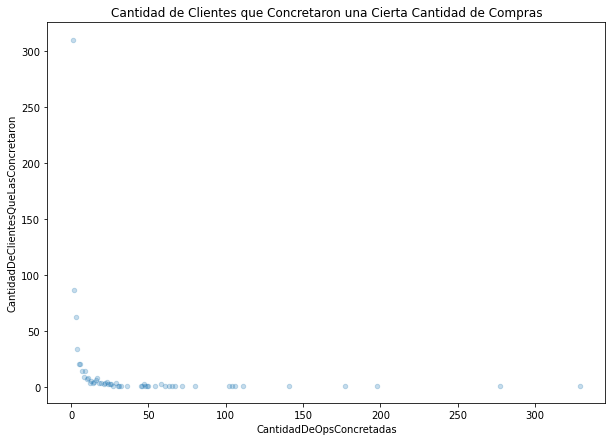

In [25]:
# original, con todos los datos
clientes_compraron.plot.scatter('CantidadDeOpsConcretadas',\
                                'CantidadDeClientesQueLasConcretaron',\
                                title='Cantidad de Clientes que Concretaron una Cierta Cantidad de Compras',\
                                alpha=0.25,figsize=(10,7))

(0.0, 75.0)

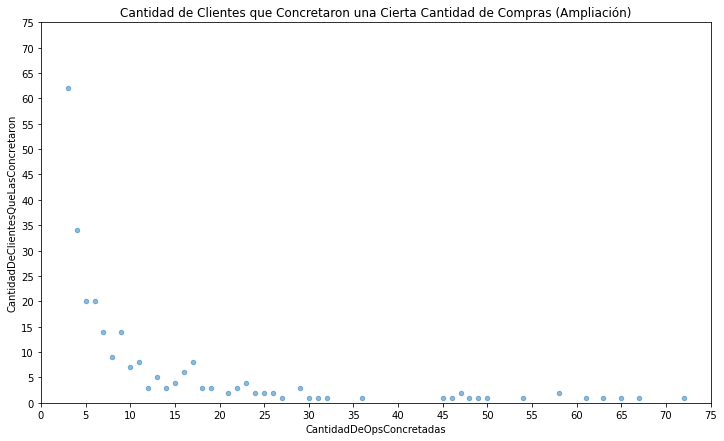

In [26]:
# ampliada, zoom
clientes_compraron.plot.scatter('CantidadDeOpsConcretadas',\
                                'CantidadDeClientesQueLasConcretaron',\
                                title='Cantidad de Clientes que Concretaron una Cierta Cantidad de Compras (Ampliación)',\
                                alpha=0.50,figsize=(12,7))
plt.xticks(np.arange(0,200 , 5))
plt.xlim(0, 75)
plt.yticks(np.arange(0,100 , 5))
plt.ylim(0, 75)


# La moneda.
# Análisis de nulos y no nulos de las columnas ASP y ASP_(converted), y conversión de todas las monedas a su equivalente en USD en columnas nuevas dedicadas

In [27]:
moneda=df

In [28]:
moneda.filter(like='ASP')

,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted)
0,EUR,0.52,USD,0.59
1,EUR,0.53,USD,0.60
2,USD,0.48,USD,0.48
3,USD,0.53,USD,0.53
4,USD,0.53,USD,0.53
...,...,...,...,...
16942,EUR,0.52,USD,0.59
16943,EUR,0.52,USD,0.59
16944,EUR,0.52,USD,0.59
16945,USD,0.64,USD,0.64


### Análisis: ASP y ASP_(converted) iguales a cero se descartan porque no influyen

#### Analizo datos con columna ASP = 0

In [29]:
(df['ASP_Currency']==df['Total_Amount_Currency']).sum() # coinciden en todos los registros.

16947

In [30]:
len(moneda[moneda['ASP']==0]) # son 301 datos <- estos no son "nulos" nan sino los que valen el número 0

301

In [31]:
moneda[moneda['ASP']==0].Total_Taxable_Amount_Currency.value_counts() # son 301 datos
#obs: uno pagó 3 millones de dólares
# 54 son USD, esos no necesitan conversión. # pero ojo que son won, lost, etc.

JPY    228
USD     54
EUR     19
Name: Total_Taxable_Amount_Currency, dtype: int64

In [32]:
# veo cuántos de esos 54 en USD son won
moneda.loc[(moneda['Stage']=='Closed Won')&(moneda['ASP']==0)&(moneda['Total_Amount_Currency']=='USD')]\
        .Total_Amount.count()

19

In [33]:
USD_sin_considerar=moneda.loc[(moneda['Stage']=='Closed Won')&(moneda['ASP']==0)&(moneda['Total_Amount_Currency']=='USD')]\
        .Total_Amount.sum()
USD_sin_considerar

93310.03

In [34]:
USD_totales=moneda.loc[(moneda['Stage']=='Closed Won')&(moneda['Total_Amount_Currency']=='USD')]\
        .Total_Amount.sum()
USD_totales

1038684983.66

In [35]:
(USD_sin_considerar/USD_totales)*100

0.008983477326417556

In [36]:
# veo JPY y EUR
JPY_sin_convertir=moneda.loc[(moneda['Stage']=='Closed Won')&(moneda['ASP']==0)&(moneda['Total_Amount_Currency']=='JPY')]\
        .Total_Amount.sum()
JPY_sin_convertir

9041345.0

In [37]:
JPY_totales=moneda.loc[(moneda['Stage']=='Closed Won')&(moneda['Total_Amount_Currency']=='JPY')]\
        .Total_Amount.sum()
JPY_totales

6420842315.0

In [38]:
(JPY_sin_convertir/JPY_totales)*100

0.14081244416917285

In [39]:
EUR_sin_convertir=moneda.loc[(moneda['Stage']=='Closed Won')&(moneda['ASP']==0)&(moneda['Total_Amount_Currency']=='EUR')]\
        .Total_Amount.sum()
EUR_sin_convertir

441.0

In [40]:
EUR_totales=moneda.loc[(moneda['Stage']=='Closed Won')&(moneda['Total_Amount_Currency']=='EUR')]\
        .Total_Amount.sum()
EUR_totales

465312781.78

In [41]:
(EUR_sin_convertir/EUR_totales)*100

9.477495939677516e-05

ASP y ASP_converted


Datos Nulos

De los 16947 registros (productos) pertenecientes a oportunidades ganadas y perdidas en total, 3209 poseen valores nulos en las columnas con información que posibilita el cambio entre monedas, lo que representa aproximadamente un 18,9% de los datos. Consideramos que es un número significativo que no podemos despreciar para este análisis en particular. Por ello, y aprovechando que cada oportunidad posee una fecha de creación, optamos por completar los datos faltantes con los existentes para esa moneda y para el mismo día de dicho faltante. Posterior a eso aún quedan solamente dos datos faltantes, por lo que a esos sí los despreciamos.
(^ eso es cierto y es otro tema, no es lo que estoy haciendo en esta porción de código, más abajo hago eso)

Ahora:


Datos No Nulos

Entre los productos que sí contaban ya con información no nula en dichas columnas, notamos lo siguiente:
En la columna 'ASP' existen 301 valores iguales a 0. Esto ocasionará problemas, dado que dividiremos por este valor como parte de la transformación entre monedas. Notamos que entre ellos se encuentran productos pertenecientes a oportunidades de todas las Stages y con montos expresados en JPY, USD y en EUR.
En particular, para las Closed Won, los productos que están expresados en USD y tienen esta problemática de tener la columna 'ASP' en 0 representan menos del 0.009% de la suma del monto total (Total_Amount) de todos los productos expresados en USD; los montos en JPY problemáticos representan un 0.14% del monto total de ventas en esa moneda; y los problemáticos en EUR representan menos del 0,0001%.
En resumen, los montos de los productos problemáticos se encuentran expresados únicamente en tres monedas, y en cada una de las mismas ellos representan menos del 0.2% del monto total de ventas concretadas en dicha moneda. Por este motivo los consideramos despreciables para nuestro análisis, y simplemente los descartamos.

#### Continuamos: ahora, mismo análisis para ASP_(converted) = 0

In [42]:
len(moneda[moneda['ASP_(converted)']==0])

300

In [43]:
aux300=moneda[moneda['ASP_(converted)']==0].ID
len(aux300)

300

In [44]:
aux301=moneda[moneda['ASP']==0].ID
len(aux301)

301

In [45]:
set(aux301)-set(aux300)

{19213}

In [46]:
moneda.loc[moneda['ID']==19213,['Total_Amount','Total_Amount_Currency','Stage','ASP']]

,Total_Amount,Total_Amount_Currency,Stage,ASP
5312,"1,007,832.00",JPY,Closed Lost,0.00


Vemos que hay un solo elemento que difiere... en la lista, xq su ASP sí es 0.

Aunque fuera un valor problemático real, no influiría en este análisis ya que fue closed lost.

### Completo los nulos (nan)

In [47]:
moneda['ASP'].isnull().sum()

3209

In [48]:
moneda['ASP_(converted)'].isnull().sum()

3209

In [49]:
moneda_reduc=moneda[['ASP','ASP_Currency','ASP_(converted)','ASP_(converted)_Currency','Opportunity_Created_Date']]
moneda_reduc.head(5)

,ASP,ASP_Currency,ASP_(converted),ASP_(converted)_Currency,Opportunity_Created_Date
0,0.52,EUR,0.59,USD,12/7/2015
1,0.53,EUR,0.60,USD,12/7/2015
2,0.48,USD,0.48,USD,12/8/2015
3,0.53,USD,0.53,USD,12/8/2015
4,0.53,USD,0.53,USD,12/8/2015


### Completo los nans con la media de los no nans para ese día

In [50]:
moneda_ASP=moneda[['ASP','ASP_Currency','Opportunity_Created_Date']]
moneda_ASP.head(5)

,ASP,ASP_Currency,Opportunity_Created_Date
0,0.52,EUR,12/7/2015
1,0.53,EUR,12/7/2015
2,0.48,USD,12/8/2015
3,0.53,USD,12/8/2015
4,0.53,USD,12/8/2015


In [51]:
moneda['ASP_mean_por_date-y-moneda']=moneda_ASP.groupby(['Opportunity_Created_Date','ASP_Currency']).transform('mean')
moneda[['ASP','ASP_Currency','ASP_(converted)','ASP_(converted)_Currency','Opportunity_Created_Date','ASP_mean_por_date-y-moneda']]

,ASP,ASP_Currency,ASP_(converted),ASP_(converted)_Currency,Opportunity_Created_Date,ASP_mean_por_date-y-moneda
0,0.52,EUR,0.59,USD,12/7/2015,0.53
1,0.53,EUR,0.60,USD,12/7/2015,0.53
2,0.48,USD,0.48,USD,12/8/2015,0.49
3,0.53,USD,0.53,USD,12/8/2015,0.49
4,0.53,USD,0.53,USD,12/8/2015,0.49
...,...,...,...,...,...,...
16942,0.52,EUR,0.59,USD,12/4/2015,0.53
16943,0.52,EUR,0.59,USD,12/4/2015,0.53
16944,0.52,EUR,0.59,USD,12/4/2015,0.53
16945,0.64,USD,0.64,USD,12/5/2015,0.64


In [52]:
moneda_ASP_converted=moneda[['ASP_(converted)','ASP_(converted)_Currency','Opportunity_Created_Date']]
moneda_ASP_converted.head(5)

,ASP_(converted),ASP_(converted)_Currency,Opportunity_Created_Date
0,0.59,USD,12/7/2015
1,0.60,USD,12/7/2015
2,0.48,USD,12/8/2015
3,0.53,USD,12/8/2015
4,0.53,USD,12/8/2015


In [53]:
moneda['ASP_(converted)_mean_por_date-y-moneda']=moneda_ASP_converted.\
                        groupby(['Opportunity_Created_Date','ASP_(converted)_Currency']).transform('mean')
moneda[['ASP','ASP_Currency','ASP_(converted)','ASP_(converted)_Currency','Opportunity_Created_Date',\
       'ASP_mean_por_date-y-moneda','ASP_(converted)_mean_por_date-y-moneda']]

,ASP,ASP_Currency,ASP_(converted),ASP_(converted)_Currency,Opportunity_Created_Date,ASP_mean_por_date-y-moneda,ASP_(converted)_mean_por_date-y-moneda
0,0.52,EUR,0.59,USD,12/7/2015,0.53,0.59
1,0.53,EUR,0.60,USD,12/7/2015,0.53,0.59
2,0.48,USD,0.48,USD,12/8/2015,0.49,0.49
3,0.53,USD,0.53,USD,12/8/2015,0.49,0.49
4,0.53,USD,0.53,USD,12/8/2015,0.49,0.49
...,...,...,...,...,...,...,...
16942,0.52,EUR,0.59,USD,12/4/2015,0.53,0.59
16943,0.52,EUR,0.59,USD,12/4/2015,0.53,0.59
16944,0.52,EUR,0.59,USD,12/4/2015,0.53,0.59
16945,0.64,USD,0.64,USD,12/5/2015,0.64,0.64


#### Tengo las columnas con las que completar, ahora completo

In [54]:
moneda_completada=moneda
moneda_completada[['ASP','ASP_Currency','ASP_(converted)','ASP_(converted)_Currency','Opportunity_Created_Date',\
       'ASP_mean_por_date-y-moneda','ASP_(converted)_mean_por_date-y-moneda']]

,ASP,ASP_Currency,ASP_(converted),ASP_(converted)_Currency,Opportunity_Created_Date,ASP_mean_por_date-y-moneda,ASP_(converted)_mean_por_date-y-moneda
0,0.52,EUR,0.59,USD,12/7/2015,0.53,0.59
1,0.53,EUR,0.60,USD,12/7/2015,0.53,0.59
2,0.48,USD,0.48,USD,12/8/2015,0.49,0.49
3,0.53,USD,0.53,USD,12/8/2015,0.49,0.49
4,0.53,USD,0.53,USD,12/8/2015,0.49,0.49
...,...,...,...,...,...,...,...
16942,0.52,EUR,0.59,USD,12/4/2015,0.53,0.59
16943,0.52,EUR,0.59,USD,12/4/2015,0.53,0.59
16944,0.52,EUR,0.59,USD,12/4/2015,0.53,0.59
16945,0.64,USD,0.64,USD,12/5/2015,0.64,0.64


In [55]:
len(moneda) #16947

16947

In [56]:
moneda_completada.dropna(subset=['ASP_mean_por_date-y-moneda',\
                                 'ASP_(converted)_mean_por_date-y-moneda'],inplace=True)

moneda_completada[['ASP','ASP_Currency','ASP_(converted)','ASP_(converted)_Currency','Opportunity_Created_Date',\
       'ASP_mean_por_date-y-moneda','ASP_(converted)_mean_por_date-y-moneda']]

,ASP,ASP_Currency,ASP_(converted),ASP_(converted)_Currency,Opportunity_Created_Date,ASP_mean_por_date-y-moneda,ASP_(converted)_mean_por_date-y-moneda
0,0.52,EUR,0.59,USD,12/7/2015,0.53,0.59
1,0.53,EUR,0.60,USD,12/7/2015,0.53,0.59
2,0.48,USD,0.48,USD,12/8/2015,0.49,0.49
3,0.53,USD,0.53,USD,12/8/2015,0.49,0.49
4,0.53,USD,0.53,USD,12/8/2015,0.49,0.49
...,...,...,...,...,...,...,...
16942,0.52,EUR,0.59,USD,12/4/2015,0.53,0.59
16943,0.52,EUR,0.59,USD,12/4/2015,0.53,0.59
16944,0.52,EUR,0.59,USD,12/4/2015,0.53,0.59
16945,0.64,USD,0.64,USD,12/5/2015,0.64,0.64


#### Descarté los nulos que quedaban, eran 2. Ahora sí completo (ASP y ASP_(converted))

In [57]:
moneda_completada.ASP.fillna(moneda_completada['ASP_mean_por_date-y-moneda'],inplace=True)

In [58]:
moneda_completada['ASP'].isnull().sum()

0

In [59]:
moneda_completada['ASP_(converted)'].fillna(moneda_completada['ASP_(converted)_mean_por_date-y-moneda'],inplace=True)

In [60]:
moneda_completada['ASP_(converted)'].isnull().sum()

0

##### Las columnas ASP y ASP_(converted) quedaron libres de nans.

In [61]:
## convierto a usd en columnas nuevas:
moneda_completada["Value_ASP_converted_to_ASP"]=(moneda_completada["ASP_(converted)"]/moneda_completada["ASP"])
moneda_completada["Total_Amount_in_USD"]=(moneda_completada["Total_Amount"] * moneda_completada["Value_ASP_converted_to_ASP"])
moneda_completada["Total_Taxable_Amount_in_USD"]=(moneda_completada["Total_Taxable_Amount"] * moneda_completada["Value_ASP_converted_to_ASP"])
moneda_completada

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,ASP_mean_por_date-y-moneda,ASP_(converted)_mean_por_date-y-moneda,Value_ASP_converted_to_ASP,Total_Amount_in_USD,Total_Taxable_Amount_in_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None,0.53,0.59,1.13,"5,964,043.80","5,964,043.80"
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"54,552.68","54,552.68"
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None,0.49,0.49,1.00,"83,865.60","83,865.60"
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None,0.49,0.49,1.00,"7,421,881.50","7,421,881.50"
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None,0.49,0.49,1.00,"13,357,192.50","13,357,192.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,"103,350.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"116,898.79","339,006.48"
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,"93,015.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"105,208.91","339,006.48"
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,"103,350.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"116,898.79","339,006.48"
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,"2,346,796.88",USD,0.00,Closed Lost,Prod_Category_A_None,0.64,0.64,1.00,"2,346,796.88",0.00


# Las familias (Product_Family)

In [62]:
# Total recaudación
df.loc[df['Stage']=='Closed Won','Total_Amount_in_USD'].sum()

1661673259.3915513

In [63]:
# Total cantidad de ventas
len(df.loc[df['Stage']=='Closed Won','Total_Amount_in_USD'])

9533

In [64]:
df.loc[df['Stage']=='Closed Won','Total_Amount_in_USD'].isnull().sum()

243

In [65]:
# o fueron gratis/donaciones, o están mal cargados.
# Representan menos del 2,6%, no influirán demasiado.

## Familias con mayor recaudación

In [67]:
# se puede reutilizar código y no guardar la salida, lo hago así para poder ejecutar cada parte independientemente de las otras
ventas_familia=df.loc[df['Stage']=='Closed Won',['Product_Family','ID','Total_Amount_in_USD']]

top_10_fams_con_mayor_recaudacion=ventas_familia.groupby(['Product_Family']).agg({'Total_Amount_in_USD':'sum'})
top_10_fams_con_mayor_recaudacion.reset_index(inplace=True)
top_10_fams_con_mayor_recaudacion.nlargest(10,'Total_Amount_in_USD')

,Product_Family,Total_Amount_in_USD
181,Product_Family_77,"172,151,127.63"
33,Product_Family_133,"163,784,352.62"
183,Product_Family_80,"131,889,690.40"
52,Product_Family_164,"126,301,130.87"
188,Product_Family_85,"101,030,473.25"
49,Product_Family_158,"87,073,641.16"
28,Product_Family_128,"69,246,593.47"
3,Product_Family_100,"68,367,403.64"
32,Product_Family_132,"65,229,675.52"
16,Product_Family_116,"62,861,437.56"


## Familias con menor recaudación

In [71]:
ventas_familia=df.loc[df['Stage']=='Closed Won',['Product_Family','ID','Total_Amount_in_USD']]

top_10_fams_con_menor_recaudacion=ventas_familia.groupby(['Product_Family']).agg({'Total_Amount_in_USD':'sum'})
top_10_fams_con_menor_recaudacion.reset_index(inplace=True)
top_10_fams_con_menor_recaudacion.nsmallest(10,'Total_Amount_in_USD')

,Product_Family,Total_Amount_in_USD
65,Product_Family_18,45.06
85,Product_Family_2,82.75
151,Product_Family_5,141.95
138,Product_Family_38,168.75
50,Product_Family_16,172.39
120,Product_Family_241,180.00
123,Product_Family_244,191.25
146,Product_Family_45,211.50
37,Product_Family_14,293.83
154,Product_Family_52,369.60


Esto es interesante como estadística, podría servir para saber qué productos priorizar al conseguir los equipos a vender. Los montos vendidos guardan obviamente relación con el monto del producto.
Vemos cuáles son las familias con mayor y menor cantidad de ventas.

## Familias más vendidas

In [66]:
ventas_familia=df.loc[df['Stage']=='Closed Won',['Product_Family','ID','Total_Amount_in_USD']]

top_10_fams_mas_vendidas=ventas_familia.groupby(['Product_Family']).agg({'ID':'count'})
top_10_fams_mas_vendidas.reset_index(inplace=True)
top_10_fams_mas_vendidas=top_10_fams_mas_vendidas.rename(columns={'ID':'cantidad_vendida'})
top_10_fams_mas_vendidas.nlargest(10,'cantidad_vendida')

,Product_Family,cantidad_vendida
33,Product_Family_133,919
181,Product_Family_77,657
32,Product_Family_132,484
15,Product_Family_115,387
105,Product_Family_226,351
188,Product_Family_85,339
3,Product_Family_100,317
16,Product_Family_116,311
140,Product_Family_4,307
28,Product_Family_128,305


## Familias menos vendidas

In [68]:
ventas_familia=df.loc[df['Stage']=='Closed Won',['Product_Family','ID','Total_Amount_in_USD']]

top_10_fams_menos_vendidas=ventas_familia.groupby(['Product_Family']).agg({'ID':'count'})
top_10_fams_menos_vendidas.reset_index(inplace=True)
top_10_fams_menos_vendidas=top_10_fams_menos_vendidas.rename(columns={'ID':'cantidad_vendida'})
top_10_fams_menos_vendidas.nsmallest(10,'cantidad_vendida')

,Product_Family,cantidad_vendida
12,Product_Family_112,1
20,Product_Family_12,1
34,Product_Family_134,1
47,Product_Family_153,1
62,Product_Family_177,1
67,Product_Family_181,1
68,Product_Family_182,1
71,Product_Family_186,1
97,Product_Family_21,1
111,Product_Family_232,1


In [69]:
# Veo cuántas familias son aquéllas de las que se vendió un único producto.
completo=ventas_familia.groupby(['Product_Family']).agg({'ID':'count'})
completo.reset_index(inplace=True)
completo[completo['ID']==1].count()

Product_Family    33
ID                33
dtype: int64

In [70]:
# Familias de las que nunca se vendió un producto
## (ID ya es la cantidad_vendida)
completo.loc[completo['ID']==1,'Product_Family'].unique()

array(['Product_Family_112', 'Product_Family_12', 'Product_Family_134',
       'Product_Family_153', 'Product_Family_177', 'Product_Family_181',
       'Product_Family_182', 'Product_Family_186', 'Product_Family_21',
       'Product_Family_232', 'Product_Family_235', 'Product_Family_236',
       'Product_Family_241', 'Product_Family_242', 'Product_Family_244',
       'Product_Family_245', 'Product_Family_34', 'Product_Family_37',
       'Product_Family_38', 'Product_Family_40', 'Product_Family_43',
       'Product_Family_45', 'Product_Family_46', 'Product_Family_48',
       'Product_Family_51', 'Product_Family_52', 'Product_Family_53',
       'Product_Family_55', 'Product_Family_59', 'Product_Family_66',
       'Product_Family_70', 'Product_Family_87', 'Product_Family_96'],
      dtype=object)

## Si hay familias que nunca se vendieron
Familias de las cuales nunca se vendieron productos (*nunca = nunca en el dataframe)

In [72]:
fams_con_ventass=ventas_familia.groupby(['Product_Family']).agg({'ID':'count','Total_Amount_in_USD':'sum'})
fams_con_ventass.reset_index(inplace=True)
fams_con_ventass.head(3)

,Product_Family,ID,Total_Amount_in_USD
0,Product_Family_0,96,"3,581.11"
1,Product_Family_1,9,"2,080.54"
2,Product_Family_10,76,"14,828.90"


In [73]:
len(df['Product_Family'].unique())

227

In [74]:
len(fams_con_ventass['Product_Family'])

203

In [75]:
# O sea que hay 227 - 203 = 24 familias de las cuales no se vendieron productos. Dif de conjuntos:
#len(set(df['Product_Family'])) # da 227
#len(set(fams_con_ventas['Product_Family'])) # da 203, ok.
#len(set(df['Product_Family'])-set(fams_con_ventas['Product_Family'])) # da 24, bien.

set(df['Product_Family'])-set(fams_con_ventass['Product_Family'])

{'Product_Family_103',
 'Product_Family_124',
 'Product_Family_13',
 'Product_Family_138',
 'Product_Family_147',
 'Product_Family_157',
 'Product_Family_159',
 'Product_Family_160',
 'Product_Family_163',
 'Product_Family_166',
 'Product_Family_172',
 'Product_Family_183',
 'Product_Family_196',
 'Product_Family_211',
 'Product_Family_214',
 'Product_Family_217',
 'Product_Family_221',
 'Product_Family_229',
 'Product_Family_239',
 'Product_Family_32',
 'Product_Family_33',
 'Product_Family_79',
 'Product_Family_8',
 'Product_Family_93'}

# (Top) Cantidad de Oportunidades Ganadas y Perdidas Según el Tipo de Oportunidad (Opportunity_Type)

In [184]:
# Hice esto al principio del archivo, debería estar en memoria, por las dudas lo ejecuto
df_wonLostCompleto=df[(df['Stage']=='Closed Won')|(df['Stage']=='Closed Lost')]
df_wonLostCompleto

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,ASP_mean_por_date-y-moneda,ASP_(converted)_mean_por_date-y-moneda,Value_ASP_converted_to_ASP,Total_Amount_in_USD,Total_Taxable_Amount_in_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None,0.53,0.59,1.13,"5,964,043.80","5,964,043.80"
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"54,552.68","54,552.68"
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None,0.49,0.49,1.00,"83,865.60","83,865.60"
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None,0.49,0.49,1.00,"7,421,881.50","7,421,881.50"
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None,0.49,0.49,1.00,"13,357,192.50","13,357,192.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,"103,350.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"116,898.79","339,006.48"
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,"93,015.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"105,208.91","339,006.48"
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,"103,350.00",EUR,"299,715.00",Closed Won,Prod_Category_A_None,0.53,0.59,1.13,"116,898.79","339,006.48"
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,"2,346,796.88",USD,0.00,Closed Lost,Prod_Category_A_None,0.64,0.64,1.00,"2,346,796.88",0.00


In [219]:
# preproces, necesito que tenga el df un registro por oportunidad
df_un_reg_por_op0=df_wonLostCompleto.groupby(['Opportunity_ID']).agg({'Stage':'min','Opportunity_Type':'min','Opportunity_Name':'min'})
df_un_reg_por_op0

,Stage,Opportunity_Type,Opportunity_Name
Opportunity_ID,,,
0,Closed Lost,Opportunity_Type_1,Opportunity_Name_12598
1,Closed Won,Opportunity_Type_1,Opportunity_Name_12600
2,Closed Won,Opportunity_Type_1,Opportunity_Name_469
3,Closed Lost,Opportunity_Type_19,Opportunity_Name_415
4,Closed Lost,Opportunity_Type_19,Opportunity_Name_851
...,...,...,...
12799,Closed Won,Opportunity_Type_1,Opportunity_Name_7202
12800,Closed Lost,Opportunity_Type_19,Opportunity_Name_11979
12801,Closed Won,Opportunity_Type_1,Opportunity_Name_9245


In [186]:
#df_un_reg_por_op0.reset_index()
df_un_reg_por_op0.columns

Index(['Stage', 'Opportunity_Type', 'Opportunity_Name'], dtype='object')

In [187]:
# Ahora sí hago lo que iba a hacer
g_oppt=df_un_reg_por_op0[['Stage','Opportunity_Type','Opportunity_Name']].groupby(['Stage','Opportunity_Type']).agg('count').nlargest(15,'Opportunity_Name')
g_oppt

Opportunity_Name
Stage       Opportunity_Type                     
Closed Won  Opportunity_Type_1               3547
            Opportunity_Type_7               3452
Closed Lost Opportunity_Type_1               3065
            Opportunity_Type_7               1540
            Opportunity_Type_19              1449
Closed Won  Opportunity_Type_8                984
Closed Lost Opportunity_Type_8                409
Closed Won  Opportunity_Type_19               324
            Opportunity_Type_12               225
            Opportunity_Type_3                140
Closed Lost Opportunity_Type_3                133
            Opportunity_Type_20               128
            Opportunity_Type_2                 46
Closed Won  Opportunity_Type_20                36
Closed Lost Opportunity_Type_4                 29

In [188]:
# acomodo
g_oppt.reset_index(inplace=True)
g_oppt.columns=['Stage','Tipo_de_oportunidad','Cantidad_de_Oportunidades']
g_oppt

,Stage,Tipo_de_oportunidad,Cantidad_de_Oportunidades
0,Closed Won,Opportunity_Type_1,3547
1,Closed Won,Opportunity_Type_7,3452
2,Closed Lost,Opportunity_Type_1,3065
3,Closed Lost,Opportunity_Type_7,1540
4,Closed Lost,Opportunity_Type_19,1449
5,Closed Won,Opportunity_Type_8,984
6,Closed Lost,Opportunity_Type_8,409
7,Closed Won,Opportunity_Type_19,324
8,Closed Won,Opportunity_Type_12,225
9,Closed Won,Opportunity_Type_3,140


In [189]:
# Ajustes para graficar
# habría que hacer un for que concatene TO_ y un i sacado de una lista de valores que vendría de recortar y
 # conservar lo que viene después de "Opportunity_Type_". # o ver cómo usar regex.
    #Son 15 valores en este caso particular.

In [190]:
g_oppt['Tipo_de_Oportunidad']=['TO_1','TO_7','TO_1','TO_7','TO_19','TO_8','TO_8','TO_19','TO_12','TO_3','TO_3','TO_20','TO_2','TO_20','TO_4']
g_oppt

,Stage,Tipo_de_oportunidad,Cantidad_de_Oportunidades,Tipo_de_Oportunidad
0,Closed Won,Opportunity_Type_1,3547,TO_1
1,Closed Won,Opportunity_Type_7,3452,TO_7
2,Closed Lost,Opportunity_Type_1,3065,TO_1
3,Closed Lost,Opportunity_Type_7,1540,TO_7
4,Closed Lost,Opportunity_Type_19,1449,TO_19
5,Closed Won,Opportunity_Type_8,984,TO_8
6,Closed Lost,Opportunity_Type_8,409,TO_8
7,Closed Won,Opportunity_Type_19,324,TO_19
8,Closed Won,Opportunity_Type_12,225,TO_12
9,Closed Won,Opportunity_Type_3,140,TO_3


Text(0.5, 1.0, 'Cantidad de Oportunidades Ganadas y Perdidas Según el Tipo de Oportunidad')

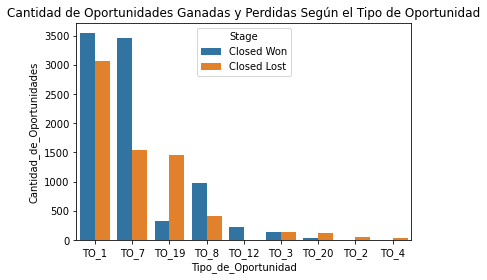

In [192]:
# Grafico
ax2 = sns.barplot(x="Tipo_de_Oportunidad", y="Cantidad_de_Oportunidades", hue="Stage", data=g_oppt)
ax2.set_title('Cantidad de Oportunidades Ganadas y Perdidas Según el Tipo de Oportunidad')

## #####

### Auxiliar: df con oportunidades 'únicas'

In [242]:
len(auxxxxx.Opportunity_Name.unique())

9789

In [218]:
#########################3

In [240]:
# Agrupo por Opportunity_Name y veo (total oportunidades únicas = 9839):
aux=df.groupby(['Opportunity_ID']).agg({'Stage':'min'})
aux=clientes.reset_index()

aux['Stage'].value_counts()

Closed Won       5072
Closed Lost      4717
Proposal           30
Negotiation        11
Qualification       9
Name: Stage, dtype: int64

In [241]:
### Así está bien (son 9839 sobre el original):
# Un registro por oportunidad
aux=df.groupby(['Opportunity_ID']).agg({'Account_Name':'min','Stage':'min'})
aux

,Account_Name,Stage
Opportunity_ID,,
0,Account_Name_619,Closed Lost
1,Account_Name_619,Closed Won
2,Account_Name_1794,Closed Won
3,Account_Name_1201,Closed Lost
4,Account_Name_1201,Closed Lost
...,...,...
12799,Account_Name_533,Closed Won
12800,Account_Name_404,Closed Lost
12801,Account_Name_726,Closed Won


In [302]:
## Fin auxiliar.